# Proyek Analisis Data: Air Quality DataSet
- Kelompok : IF-9 Numpy
- Anggota : </br>
1. MENENTUKAN KUALITAS UDARA DALAM DATASET SETIAP TAHUNYA - 10122336 - M Taufik Iqbal
2. Berapa rata-rata suhu pada daerah tersebut - 10122333 - Hisyam Rizqullah 
3. POLUSI UDARA PERTAHUN - 10122476 -  Farrel Muhammad A
4. Bagaimana tingkat polutan udara, seperti PM2.5 dan SO2, berfluktuasi selama periode waktu tertentu di suatu wilayah - 10122343 indra permana
5. Bagaimana tingkat ozon disetiap bulan pada tahun 2013 di wilayah ini? - 10122327- Danarusmia
6. Berapa rata rata debit hujan Pertahunnya - 10122325 - Alka Sabil Khubaib





## Menentukan Pertanyaan Bisnis

MENENTUKAN KUALITAS UDARA DALAM DATASET SETIAP TAHUNYA

## Menyiapkan semua library yang dibutuhkan

In [19]:
#mengambil library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [20]:
missing_value_format = ['N.A', 'na', 'n.a.','n/a','?','-']
df_data_air = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv', na_values = missing_value_format)
df_data_air

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


### Assessing Data

In [21]:
df_data_air.duplicated().values.any()

False

In [22]:
df_data_air.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35059    False
35060    False
35061    False
35062    False
35063    False
Length: 35064, dtype: bool

In [23]:
print(df_data_air.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [24]:
print(df_data_air.nunique())


No         35064
year           5
month         12
day           31
hour          24
PM2.5        481
PM10         562
SO2          294
NO2          459
CO           115
O3           886
TEMP         998
PRES         592
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64


In [25]:
df_data_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [26]:
df_data_air.isna().values.any()

True

### Cleaning Data

In [27]:
df_data_air.dropna(subset = ['CO','TEMP', 'year','PM2.5'], axis=0, inplace=True)

In [28]:
df_data_air.isna().values.any()
df_data_air.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33170 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       33170 non-null  int64  
 1   year     33170 non-null  int64  
 2   month    33170 non-null  int64  
 3   day      33170 non-null  int64  
 4   hour     33170 non-null  int64  
 5   PM2.5    33170 non-null  float64
 6   PM10     33158 non-null  float64
 7   SO2      33054 non-null  float64
 8   NO2      32986 non-null  float64
 9   CO       33170 non-null  float64
 10  O3       33081 non-null  float64
 11  TEMP     33170 non-null  float64
 12  PRES     33170 non-null  float64
 13  DEWP     33170 non-null  float64
 14  RAIN     33169 non-null  float64
 15  wd       33077 non-null  object 
 16  WSPM     33170 non-null  float64
 17  station  33170 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [29]:
df_data_air.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [30]:
df_data_air.shape

(33170, 18)

In [31]:
df_data_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33170 entries, 0 to 33169
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       33170 non-null  int64  
 1   year     33170 non-null  int64  
 2   month    33170 non-null  int64  
 3   day      33170 non-null  int64  
 4   hour     33170 non-null  int64  
 5   PM2.5    33170 non-null  float64
 6   PM10     33158 non-null  float64
 7   SO2      33054 non-null  float64
 8   NO2      32986 non-null  float64
 9   CO       33170 non-null  float64
 10  O3       33081 non-null  float64
 11  TEMP     33170 non-null  float64
 12  PRES     33170 non-null  float64
 13  DEWP     33170 non-null  float64
 14  RAIN     33169 non-null  float64
 15  wd       33077 non-null  object 
 16  WSPM     33170 non-null  float64
 17  station  33170 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.6+ MB


In [32]:
df_data_air.nunique()

No         33170
year           5
month         12
day           31
hour          24
PM2.5        468
PM10         550
SO2          188
NO2          210
CO           115
O3           617
TEMP         993
PRES         592
DEWP         602
RAIN         114
wd            16
WSPM          94
station        1
dtype: int64

## Visualization & Explanatory Analysis

MENENTUKAN KUALITAS UDARA DALAM DATASET SETIAP TAHUNYA

In [33]:
#mengambil data tahun
df_data_air['year']

0        2013
1        2013
2        2013
3        2013
4        2013
         ... 
33165    2017
33166    2017
33167    2017
33168    2017
33169    2017
Name: year, Length: 33170, dtype: int64

In [34]:
#menghitung rata2 Co per tahun
average_CO_per_year = df_data_air.groupby('year')['CO'].mean()

<BarContainer object of 5 artists>

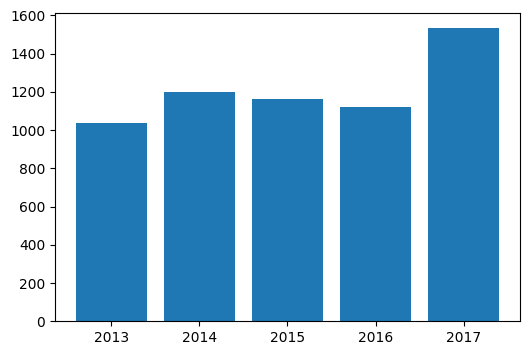

In [35]:
#membuat bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(average_CO_per_year.index, average_CO_per_year)

### Pertanyaan 2:

Berapa rata-rata suhu pada daerah tersebut

In [36]:
#mengambil data
df_data_air['TEMP']

0        -2.3
1        -2.5
2        -3.0
3        -3.6
4        -3.5
         ... 
33165    11.7
33166    10.9
33167     9.5
33168     7.8
33169     7.0
Name: TEMP, Length: 33170, dtype: float64

In [37]:
#menghitung rata2 TEMP per tahun
average_TEMP_per_year = df_data_air.groupby('year')['TEMP'].mean()
average_TEMP_per_year_reversed = average_TEMP_per_year.sort_index(ascending=False)


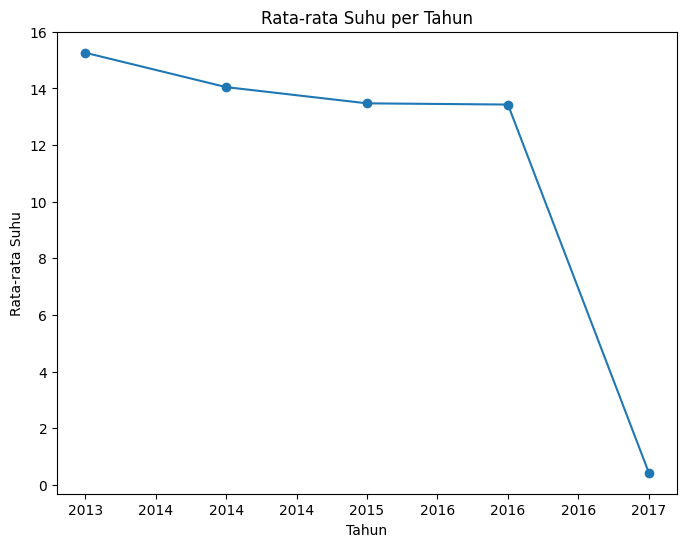

In [38]:
# Membuat line chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot line chart dari data rata-rata suhu per tahun yang telah dibalik
ax.plot(average_TEMP_per_year_reversed.index, average_TEMP_per_year_reversed, marker='o')

# Memberikan judul dan label sumbu
ax.set_title('Rata-rata Suhu per Tahun')
ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata Suhu')

# Menyusun formatter untuk sumbu x agar menampilkan tahun tanpa koma
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Tampilkan plot
plt.show()

POLUSI UDARA PERTAHUN

In [39]:
#mengambil data
df_data_air['PM2.5']

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
33165    28.0
33166    12.0
33167     7.0
33168    11.0
33169    20.0
Name: PM2.5, Length: 33170, dtype: float64

In [40]:
df_PM25_mean= df_data_air.groupby('year')['PM2.5'].mean()
average_Pm25_per_year_reversed = df_PM25_mean.sort_index(ascending=False)
average_Pm25_per_year_reversed

year
2017    79.791455
2016    61.144153
2015    69.490601
2014    79.317715
2013    70.525651
Name: PM2.5, dtype: float64

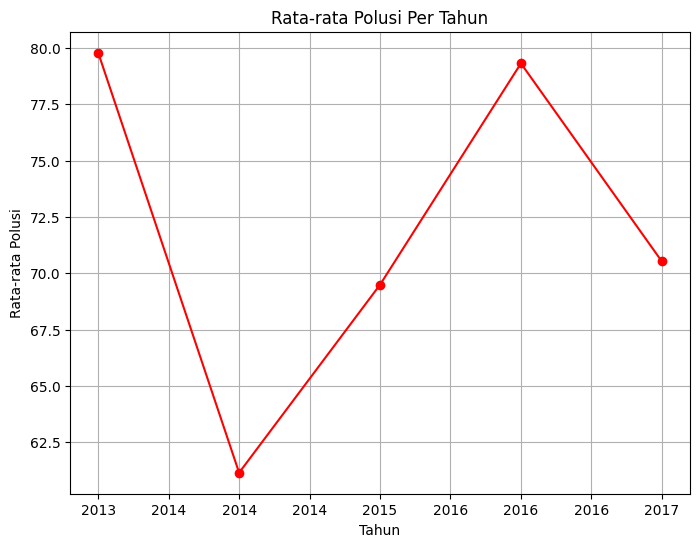

In [41]:
# Membuat line chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot line chart dari data rata-rata polusi per tahun
ax.plot(average_Pm25_per_year_reversed.index, df_PM25_mean, marker='o',color='red')

# Memberikan judul dan label sumbu
ax.set_title('Rata-rata Polusi Per Tahun')
ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata Polusi')

# Menyusun formatter untuk sumbu x agar menampilkan tahun tanpa koma
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Menambahkan grid
plt.grid(True)

# Tampilkan plot
plt.show()

Bagaimana tingkat polutan udara, seperti PM2.5 dan SO2, berfluktuasi selama periode waktu tertentu di suatu wilayah - 10122343 indra permana

In [42]:
nama_file_csv = 'PRSA_Data_Changping_20130301-20170228.csv'
dataframe_csv = pd.read_csv(nama_file_csv)

In [43]:
#Menampilkan beberapa baris pertama dari dataset
print("\nData dari file CSV :")
print(dataframe_csv.head())

#Statistik Deskriptif untuk kolom-kolom numerik
print("\nStatistik Deskriptif")
print(dataframe_csv.describe())


Data dari file CSV :
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  

Statistik Deskriptif
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.7296

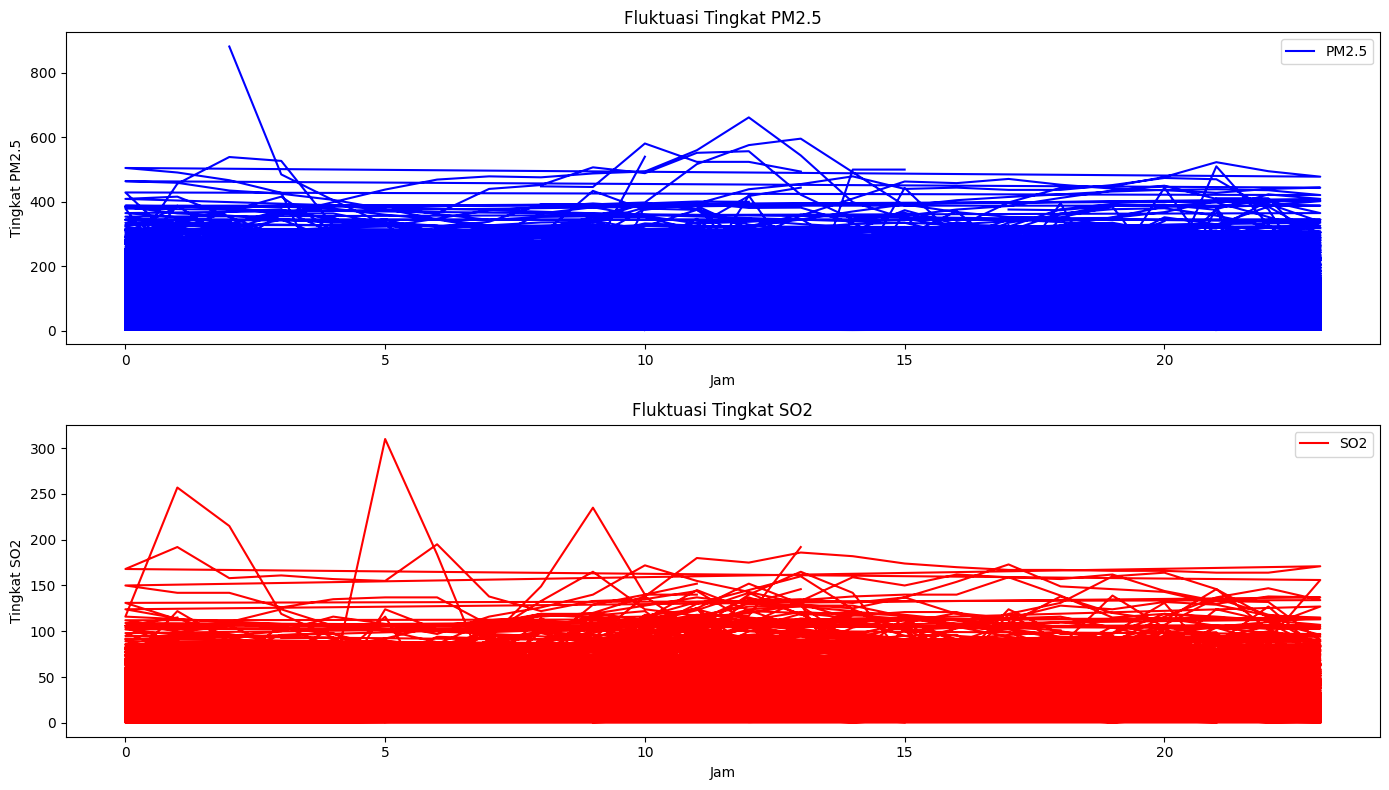

In [44]:
#Plot Data Kualitas udara dari file csv
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1) #plot PM2.5
plt.plot(dataframe_csv['hour'], dataframe_csv['PM2.5'], label='PM2.5', color = 'blue')
plt.title('Fluktuasi Tingkat PM2.5')
plt.xlabel('Jam')
plt.ylabel('Tingkat PM2.5')
plt.legend()


plt.subplot(2, 1, 2) #plot SO2
plt.plot(dataframe_csv['hour'], dataframe_csv['SO2'], label='SO2', color='red')
plt.title('Fluktuasi Tingkat SO2')
plt.xlabel('Jam')
plt.ylabel('Tingkat SO2')
plt.legend()

plt.tight_layout()
plt.show()

Bagaimana tingkat ozon disetiap bulan pada tahun 2013 di wilayah ini? - 10122327- Danarusmia

In [53]:
df_csv = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
df_csv

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [54]:
df2013=df_csv[df_csv['year']==2013]
df2013

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,7340,2013,12,31,19,19.0,95.0,12.0,23.0,200.0,53.0,6.7,1004.4,-17.4,0.0,W,2.4,Changping
7340,7341,2013,12,31,20,19.0,95.0,12.0,23.0,400.0,45.0,6.5,1004.5,-16.9,0.0,WNW,1.8,Changping
7341,7342,2013,12,31,21,20.0,62.0,19.0,35.0,400.0,42.0,7.3,1004.9,-16.2,0.0,W,4.6,Changping
7342,7343,2013,12,31,22,24.0,94.0,26.0,35.0,500.0,40.0,6.5,1004.9,-16.2,0.0,W,3.2,Changping


In [55]:
average_year_2013 = df2013.groupby('month')['O3'].mean()
average_year_2013

month
3     59.961615
4     67.750415
5     94.737350
6     83.557773
7     81.411211
8     90.854557
9     54.289005
10    30.129185
11    26.818326
12    24.871095
Name: O3, dtype: float64

In [56]:
average_O3_per_year_reversed = average_year_2013.sort_index(ascending=False)
average_O3_per_year_reversed

month
12    24.871095
11    26.818326
10    30.129185
9     54.289005
8     90.854557
7     81.411211
6     83.557773
5     94.737350
4     67.750415
3     59.961615
Name: O3, dtype: float64

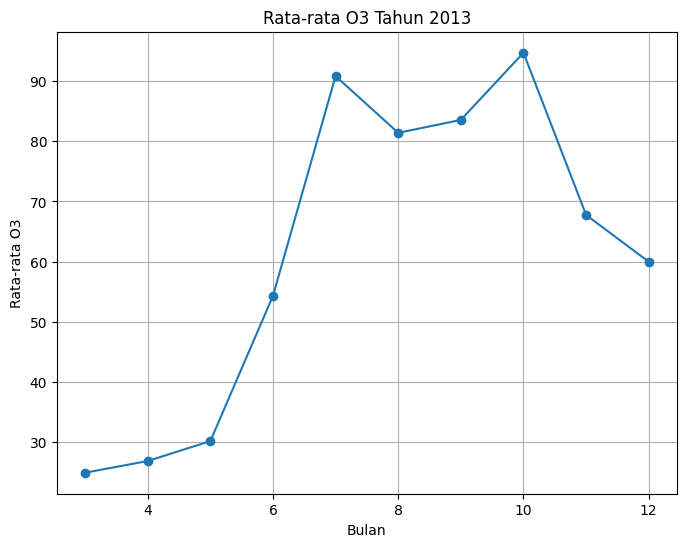

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))


ax.plot(average_O3_per_year_reversed.index,average_year_2013, marker='o')


ax.set_title('Rata-rata O3 Tahun 2013')
ax.set_xlabel('Bulan')
ax.set_ylabel('Rata-rata O3')


ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))


plt.grid(True)


plt.show()

Berapa rata rata debit hujan Pertahunnya
-10122325
-Alka Sabil Khubaib



In [58]:
# Membaca dataset dari file CSV
nama_file_csv = 'PRSA_Data_Changping_20130301-20170228.csv'
dataframe_csv = pd.read_csv(nama_file_csv)

In [59]:
# Filter data untuk baris dengan hujan (RAIN tidak sama dengan 0)
data_hujan = dataframe_csv[dataframe_csv['RAIN'] != 0]

# Menampilkan hasil
print(data_hujan)

          No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
269      270  2013      3   12     5  126.0  164.0  54.0  84.0  1899.0  42.0   
270      271  2013      3   12     6  124.0  168.0  56.0  85.0  1800.0  42.0   
271      272  2013      3   12     7  124.0  125.0  17.0  82.0  1800.0  42.0   
272      273  2013      3   12     8  100.0  106.0  16.0  81.0  1700.0  42.0   
432      433  2013      3   19     0   41.0   59.0  11.0  37.0   800.0  44.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34890  34891  2017      2   21    18   84.0   84.0   7.0  83.0  1100.0   2.0   
34891  34892  2017      2   21    19   86.0   86.0   5.0  75.0   100.0   3.0   
34892  34893  2017      2   21    20   80.0   80.0   4.0  70.0   100.0   4.0   
34893  34894  2017      2   21    21   66.0   66.0   3.0  66.0   900.0   6.0   
34894  34895  2017      2   21    22   81.0   81.0   3.0  68.0  1100.0   3.0   

       TEMP    PRES  DEWP  RAIN   wd  W

In [60]:
# Mengonversi kolom 'year' menjadi tipe datetime
dataframe_csv['date'] = pd.to_datetime(dataframe_csv[['year', 'month', 'day', 'hour']])


In [61]:
# Ekstraksi tahun dari kolom 'date'
dataframe_csv['tahun'] = dataframe_csv['date'].dt.year


In [62]:
debit_rata_rata_pertahun = dataframe_csv.groupby('year')['RAIN'].mean()

# Menampilkan hasil
print(debit_rata_rata_pertahun)



year
2013    0.066068
2014    0.037888
2015    0.082638
2016    0.065330
2017    0.001422
Name: RAIN, dtype: float64


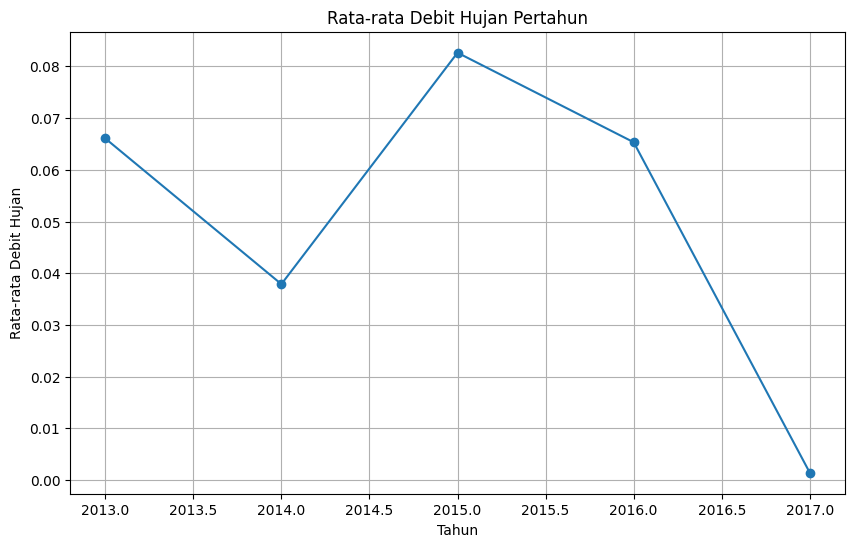

In [63]:
# Membuat grafik rata rata debit hujan
plt.figure(figsize=(10, 6))
plt.plot(debit_rata_rata_pertahun.index, debit_rata_rata_pertahun.values, marker='o')
plt.title('Rata-rata Debit Hujan Pertahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Debit Hujan')
plt.grid(True)
plt.show()

## Kesimpulan

Kesimpulan pertanyaan 1

Kita bisa melihat kualitas udara setiap tahunnya berdasarkan grafik diatas. kualitas udarapun sangat penting dalam meningkatkan kesejahteraan etnah itu masyarakat, pelanggan, dan karyawan. menilai kualias udara berdasarkan CO dapat membantu mengidentifikasi dan mengurangi sumber polusi dilingkungan kerja dan data ini pun dapat membantu bisnis untuk menyediakan ventilasi yang baik  dan dapat berkontribusi dalam upaya pelestarian lingkungan dan pengurangan emisi gas rumah kaca.(Taufik)



Kesimpulan pertanyaan 2

Sesuai dengan perhitungan rata” suhu pada daerah changping dari tahun ke tahun  berada di sekitar 11° C

Kesimpulan pertanyaan 3

berdasarkan grafik pertanyaan nomor 3 dapat disimpulkan bahwa, tingkat polusi udara(pm2.5) pertahun di daerah tersebut rata rata di atas ambang maksimal yang seharusnya di bawah 65, sebagaimana jika di atas 65 maka dikatakan berbahaya bagi tubuh mahluk hidup di daerah tersebut(farrel)


Kesimpulan pertanyaan 4

Tingkat fluktuasi polutan udara, dengan rata-rata PM2.5 mencapai 400 (tertinggi 800 pada jam 4) dan SO2 sekitar 100 (tertinggi 300 pada jam 5), menciptakan kondisi udara yang berpotensi berbahaya.Fluktuasi tingkat polutan tersebut menciptakan kualitas udara yang buruk, yang dapat menyebabkan penurunan kualitas hidup secara keseluruhan. (indra)

Kesimpulan pertanyaan 5

Berdasarkan grafik di atas, dapat disimpulkan bahwa tingkat ozon(O3) setiap bulan per tahun 2013 tertinggi di changping berada di bulan 10 (danar)


Kesimpulan pertanyaan 6

Berdasarkan grafik yang tertera pada pertanyaan nomor 6 debit hujan pertahun ada perubahan signifikan yang mana pada awal tahun mengalami debit hujan yang lumayan tinggi dan pada pertengahan tahun ada nya penurunan debit hujan yang sangat besar dan pada akhir tahun mengalami kenaikan debit hujan yang tinggi bisa kita simpul kan bahwa akan tidak akan banyak terjadinya banjir pada perusahaan(alka)